In [344]:
#importing libraries to assist with cleaning, wrangling and plotting the data
#np, pd, and plt are names giving to each library to access their methods and functions
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#using pandas to import the data by it's absolute pathname
#displaying the first and last 5 rows of data
df = pd.read_excel('/Users/ejoe/PycharmProjects/DataTechPlots/MI_vaccine_data_CLEANED.xls').head(5).tail(5)
#The dataframe is assigned to a variable name df to access it when wrangling and ploting
df


,Person's Residence in Preparedness Region,Person's Residence in Local Health Department Jurisdiction,Person's Residence in County,Sex,Age Group,Vaccine Type,Dose Number,Week Ending Date,Doses Administered
0,Region 1,Ingham County Health Department,Ingham,F,12-15 years,Pfizer,Second Dose,2021-06-05,835
1,Region 1,Ingham County Health Department,Ingham,M,12-15 years,Pfizer,Second Dose,2021-06-05,764
2,Region 1,Ingham County Health Department,Ingham,M,12-15 years,Pfizer,Second Dose,2021-06-12,706
3,Region 1,Ingham County Health Department,Ingham,F,12-15 years,Pfizer,Second Dose,2021-06-12,699
4,Region 1,Livingston County Health Department,Livingston,F,12-15 years,Pfizer,Second Dose,2021-06-12,572


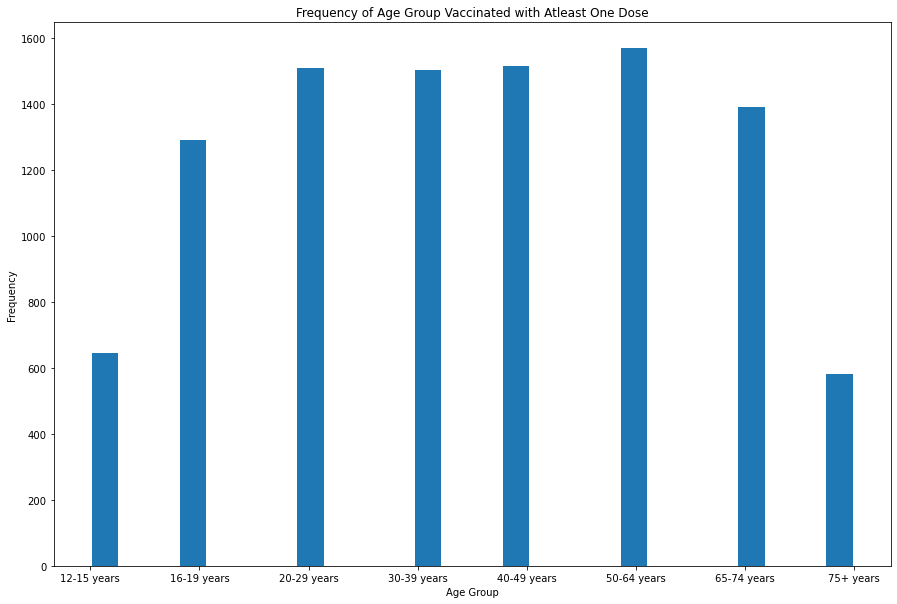

In [340]:
#Histogram

#calling matplotlib histogram plot function and setting the size of the figure
plt.figure(figsize=(15,10))
#bins = auto counts the frequency of each age group
plt.hist(df['Age Group'], bins = "auto", histtype = 'bar', rwidth = 0.9)
#assigning the x and y axis abd title label 
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Age Group Vaccinated with Atleast One Dose')
#function to display plot
plt.show()


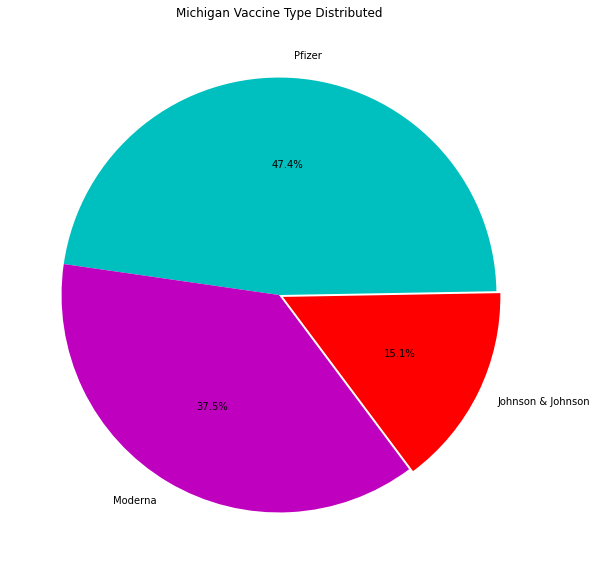

In [205]:
#Pie Plot

# creating counters for each vaccine type in the dataframe under the 'Vaccine Type' column
pfizer = 0
moderna = 0
jj = 0

#using a for each loop to count the frequency of each vaccine type
for value in df['Vaccine Type']:
    if value == 'Pfizer':
        pfizer += 1
    if value == 'Moderna':
        moderna += 1
    if value == 'J&J':
        jj += 1
        
#calling matplotlib pie plot function
#creating lists that contains the count of each vaccine type, label name and slice color      
slices = [pfizer, moderna, jj]
vaccine = ['Pfizer', 'Moderna', 'Johnson & Johnson']
cols = ['c','m','r']
plt.figure(figsize=(10,10))
plt.pie(slices,
        labels=vaccine,
        colors=cols,
        #startangle sets the pie plot at an angle
        startangle=True,
        #shadow = False removes the shadow from the plot
        shadow=False,
        explode=(0, 0, 0.02),
        autopct='%1.1f%%')
plt.title('Michigan Vaccine Type Distributed')
plt.show()
    



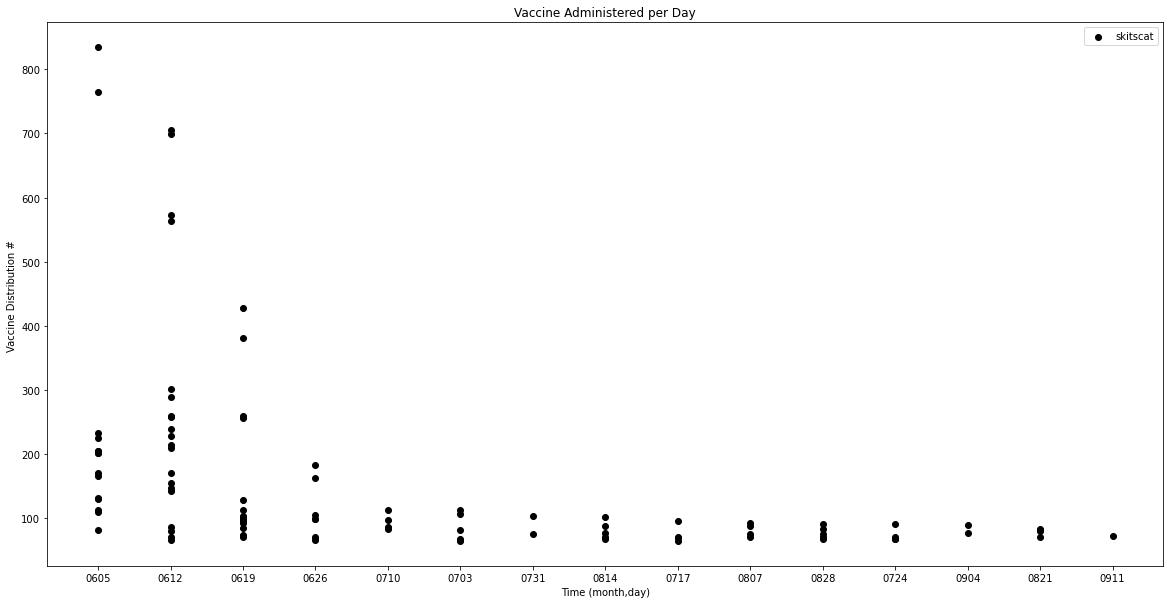

In [174]:
# Scatter Plot

# using Pandas Time series/ date function to extract the week ending month and day 
week_ending_date_month_day = pd.to_datetime(df['Week Ending Date']).dt.strftime('%m%d')

#creating a list to store each date
month = []
#for each loop circle through each value in the 'Week Ending Date' column
for value in week_ending_date_month_day:
    #The append function adds a new element to the end of the list
    month.append(value)
#Accessing the values under the 'Doses Administered' column and assigning it to a variable
d = df['Doses Administered']

#converting data stored in d to a list using the to.list() function in python
doses = d.tolist()

plt.figure(figsize=(20,10))
#using the scatter plot function from matplotlib library 
plt.scatter(month,doses,label = 'Vaccine Doses', color = 'k')
plt.xlabel('Time (month,day)')
plt.ylabel('Vaccine Distribution # ')
plt.title('Vaccine Administered per Day')
plt.show()

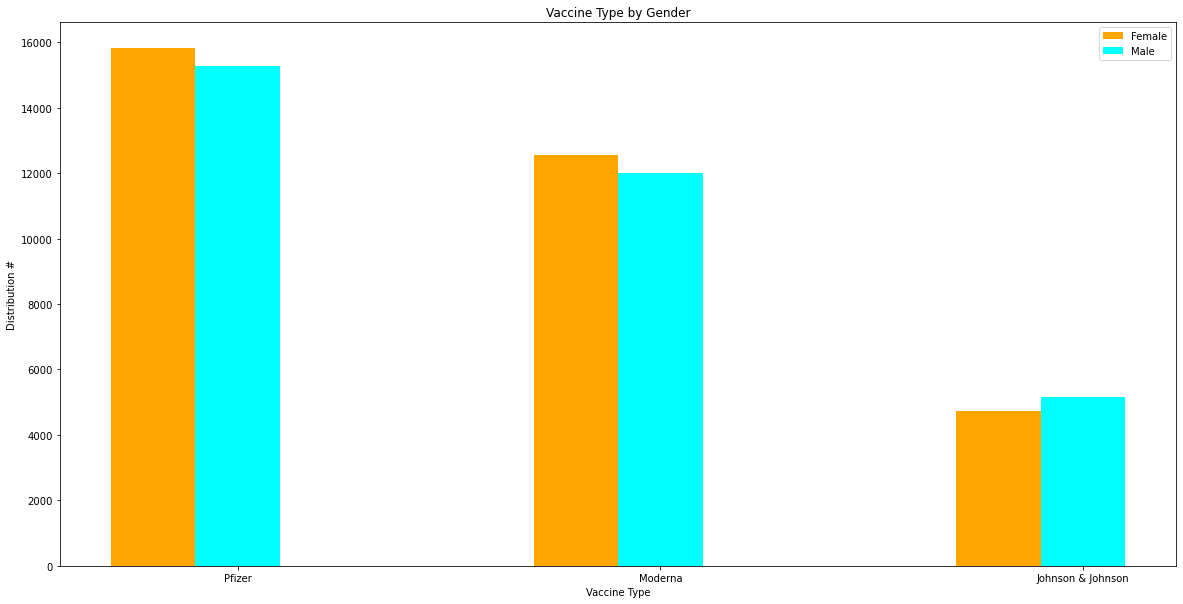

<function matplotlib.pyplot.stackplot(x, *args, labels=(), colors=None, baseline='zero', data=None, **kwargs)>

In [213]:
#Bar Graph
#creating lists to append the value of each vaccine type for females in Michigan 
f_pf = []
f_m = []
f_jj = []

#creating a for each loop searching through dataframe of vaccinated female
for value in df['Vaccine Type'][df['Sex'] == 'F']:
    #appending each vaccine type to the corresponding list 
    if value == 'Pfizer':
        f_pf.append(value)
    if value == 'Moderna':
        f_m.append(value)
    if value == 'J&J':
        f_jj.append(value)
#creating lists to append the value of each vaccine type for males in Michigan    
m_pf = []
m_m = []
m_jj = []
for value in df['Vaccine Type'][df['Sex'] == 'M']:
    if value == 'Pfizer':
        m_pf.append(value)
    if value == 'Moderna':
        m_m.append(value)
    if value == 'J&J':
        m_jj.append(value)
        
        
x = np.arange(3)
#using Python len function to get the vaccine count for each vaccine type
y1 = [len(f_pf), len(f_m), len(f_jj)]
y2 = [len(m_pf), len(m_m), len(m_jj)]
width = 0.2
# using matplotlib bar plot function to plot and group data by vaccine type
plt.figure(figsize=(20,10))
plt.bar(x - 0.2, y1, width, color='orange')
plt.bar(x, y2, width, color='cyan')
plt.xticks(x, ['Pfizer', 'Moderna', 'Johnson & Johnson'])
plt.xlabel('Vaccine Type')
plt.ylabel('Distribution #')
plt.title('Vaccine Type by Gender')
plt.legend(['Female','Male'])
plt.show()     
plt.stackplot


In [342]:
#using Pandas groupby fuction to group large amount of data 
#using var function to return an unbiased variance 
df.groupby('Week Ending Date').var()


,Doses Administered
Week Ending Date,
2021-06-05,5465.226433
2021-06-12,6928.834961
2021-06-19,2063.277167
2021-06-26,528.238808
2021-07-03,315.045284
2021-07-10,257.065408
2021-07-17,205.762481
2021-07-24,228.313531
2021-07-31,256.289188


Text(0, 0.5, 'Doses Administered')

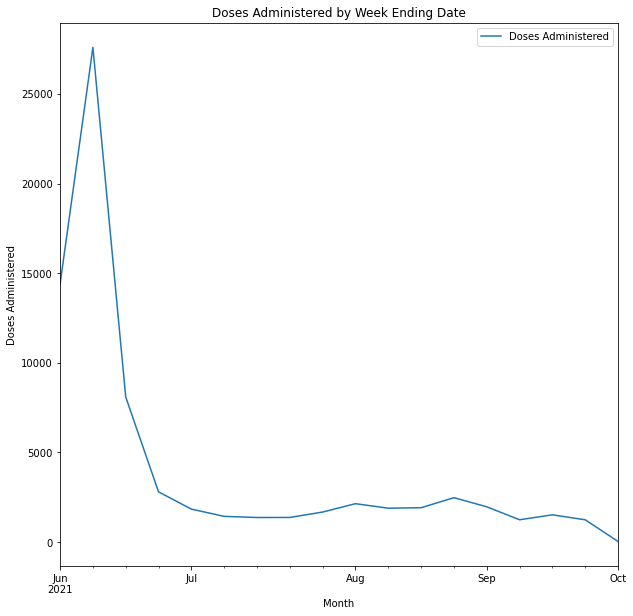

In [288]:
#using Pandas plot function which chooses the appropriate plot for the data
Doses_by_WeekEnding = df.groupby('Week Ending Date').var().plot(figsize = (10,10), 
title = 'Doses Administered by Week Ending Date')
#setting the x and y axis label
Doses_by_WeekEnding.set_xlabel("Month")
Doses_by_WeekEnding.set_ylabel("Doses Administered")



<AxesSubplot:xlabel="Person's Residence in Preparedness Region">

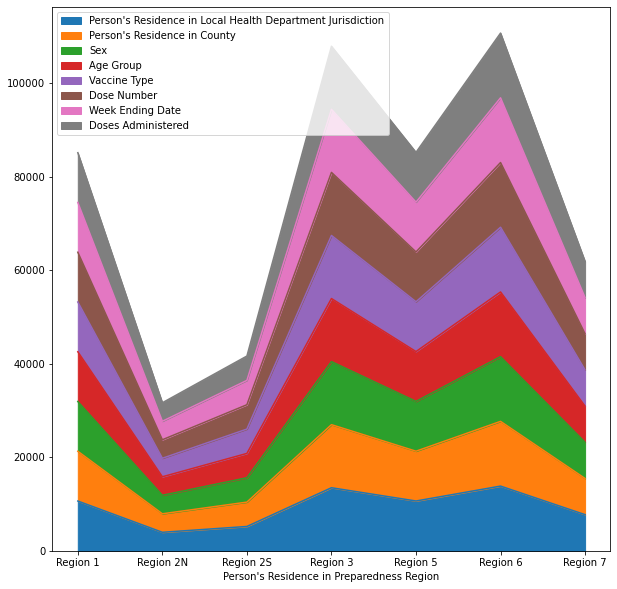

In [306]:
#using Pandas groupby fuction to group the regions
#using count function to count non-NA cells for each column
#using pandas area plot function to  display quantitative data visually
df.groupby(['Person\'s Residence in Preparedness Region']).count().plot.area(figsize = (10,10)
                                        ,title = 'Person\'s Residence in Preparedness Region')
